In [1]:
from Projects.Functions.Context.context import ProjectContext
from Projects.Functions.Data_cleaning.Data_cleaning import *
from Projects.Functions.EDA.eda import *
from Projects.Functions.Report.report import Report
from scipy.stats import iqr, shapiro,kstest

In [2]:
report=Report("Car_insurance")
test = (ProjectContext()
        .add_project_title("Test EDA Prject")
        .add_project_reason("test reason")
        .add_project_goal("test Goal")
        .add_project_data_source("test source")
        .get_context())
report.doc_add_paragraph(test)

In [3]:
report.doc_add_heading("Lecture du dataset")
df= dataset_reading(r"C:\Users\tallar\Documents\PROJETS\EDA_and_ML\Projects\Project_EDA\Repositories\Data\car_insurance.csv")
cible="outcome"
df.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
size, shape = dataset_dimensions(df)
report.add_combo("Dimensions du dataset", f" size : {size} \n shape : {shape}")
print(size,shape)

180000 (10000, 18)


In [5]:
print(dataset_data_types(df))
report.add_combo("Les types de données")
report.doc_add_table(dataset_data_types(df))

                           0
id                     int64
age                    int64
gender                 int64
driving_experience    object
education             object
income                object
credit_score         float64
vehicle_ownership    float64
vehicle_year          object
married              float64
children             float64
postal_code            int64
annual_mileage       float64
vehicle_type          object
speeding_violations    int64
duis                   int64
past_accidents         int64
outcome              float64


In [6]:
print(dataset_stats(df))
report.add_combo("Les statistiques de base", str(dataset_stats(df)))

                  id           age        gender  credit_score  \
count   10000.000000  10000.000000  10000.000000   9018.000000   
mean   500521.906800      1.489500      0.499000      0.515813   
std    290030.768758      1.025278      0.500024      0.137688   
min       101.000000      0.000000      0.000000      0.053358   
25%    249638.500000      1.000000      0.000000      0.417191   
50%    501777.000000      1.000000      0.000000      0.525033   
75%    753974.500000      2.000000      1.000000      0.618312   
max    999976.000000      3.000000      1.000000      0.960819   

       vehicle_ownership       married      children   postal_code  \
count       10000.000000  10000.000000  10000.000000  10000.000000   
mean            0.697000      0.498200      0.688800  19864.548400   
std             0.459578      0.500022      0.463008  18915.613855   
min             0.000000      0.000000      0.000000  10238.000000   
25%             0.000000      0.000000      0.000000  1

In [7]:
print(dataset_duplicates(df))
report.add_combo("Les doublons", str(dataset_duplicates(df)))

0


In [8]:
print(dataset_categorical_values(df))
report.add_combo("Les données de type catégorielles", str(dataset_categorical_values(df)))

[]


In [9]:
print(dataset_numerical_values(df))
report.add_combo("Les données de type numérique", str(dataset_numerical_values(df)))

['id', 'age', 'gender', 'credit_score', 'vehicle_ownership', 'married', 'children', 'postal_code', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents', 'outcome']


In [10]:
print(dataset_na_values(df))
report.add_combo("Les données non valides", str(dataset_na_values(df)))

2


In [11]:
df = dataset_na_fill(df,cible)

In [12]:
df= dataset_na_drop(df)

<Figure size 100x100 with 0 Axes>

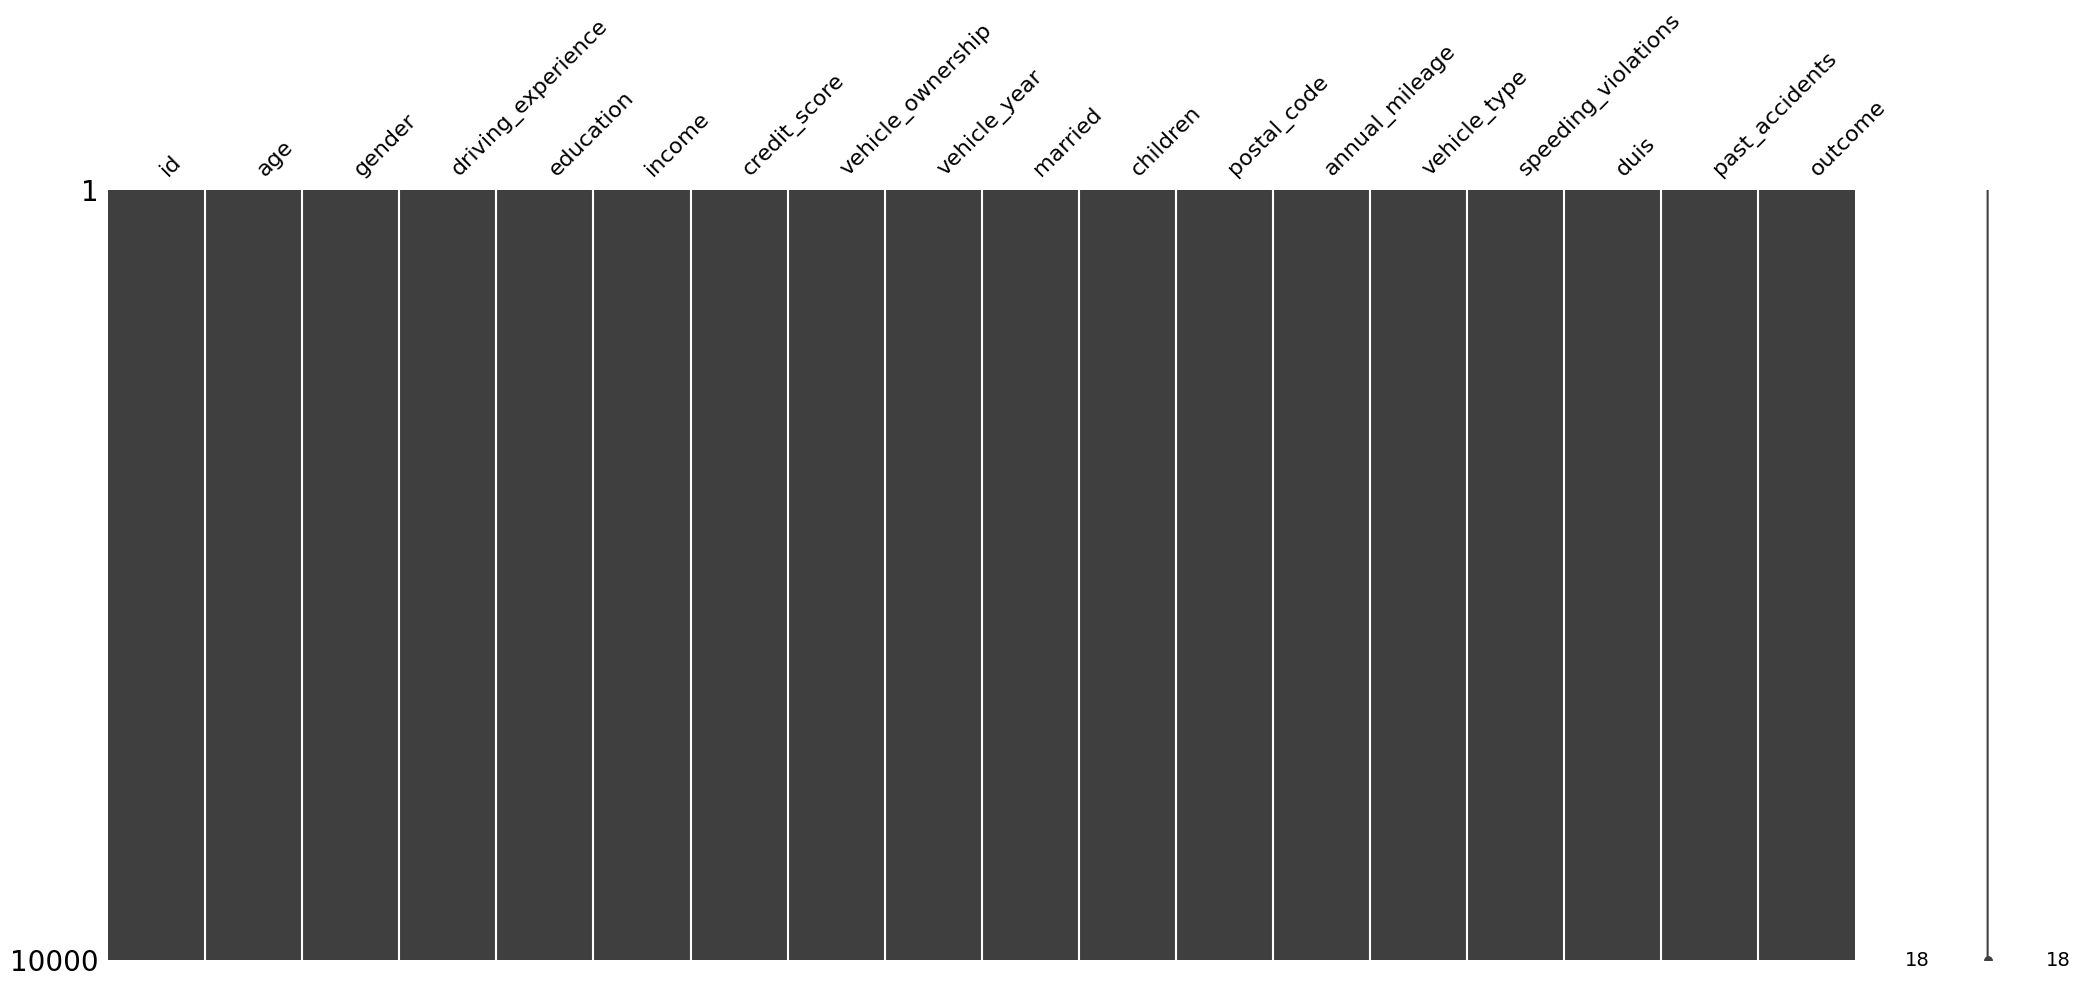

In [13]:
dataset_missing_values(df)

In [14]:
analyses = category_data_analysis(df,cible)
print(analyses)

cats
[]



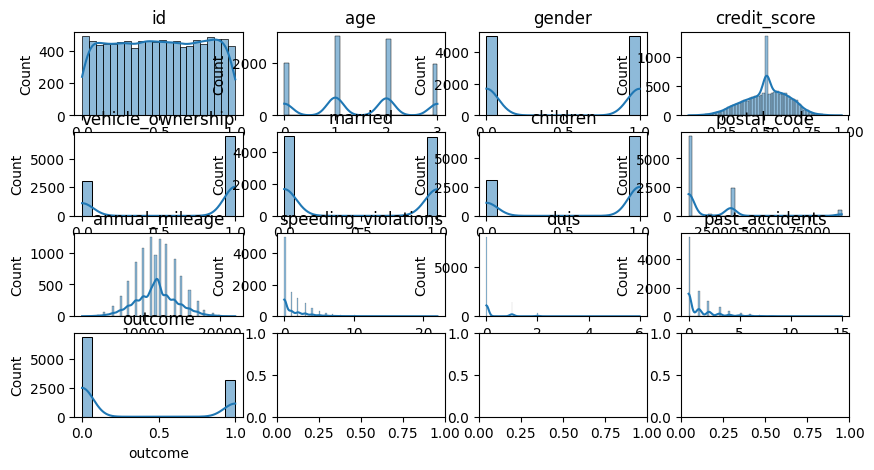

In [15]:
analyses = distribution_analysis_for_int_and_float_features(df,"vide")

In [16]:
texte, infos, liste_norm, test = checking_normality_of_features(df,0.05,kstest)
print(texte)

<function kstest at 0x0000028CB3E320C0>
 feature id : 
 stats:1.0 
 p_value:0.0 
 > Distribution normale des données (Test de <function kstest at 0x0000028CB3E320C0>) : Mise en place des hypothèses (alpha) = 0.05:
H0 > (les données suivent une distribution normale)
H1 > (les données ne suivent pas une distribution normale) 

Ci-dessous les champs du dataset qui ne semblent pas suivre une distribution suivant le test de <function kstest at 0x0000028CB3E320C0>
 feature age : 
 stats:0.64 
 p_value:0.0 
 > Distribution normale des données (Test de <function kstest at 0x0000028CB3E320C0>) : Mise en place des hypothèses (alpha) = 0.05:
H0 > (les données suivent une distribution normale)
H1 > (les données ne suivent pas une distribution normale) 

Ci-dessous les champs du dataset qui ne semblent pas suivre une distribution suivant le test de <function kstest at 0x0000028CB3E320C0>
 feature gender : 
 stats:0.5 
 p_value:0.0 
 > Distribution normale des données (Test de <function kstest at 0x

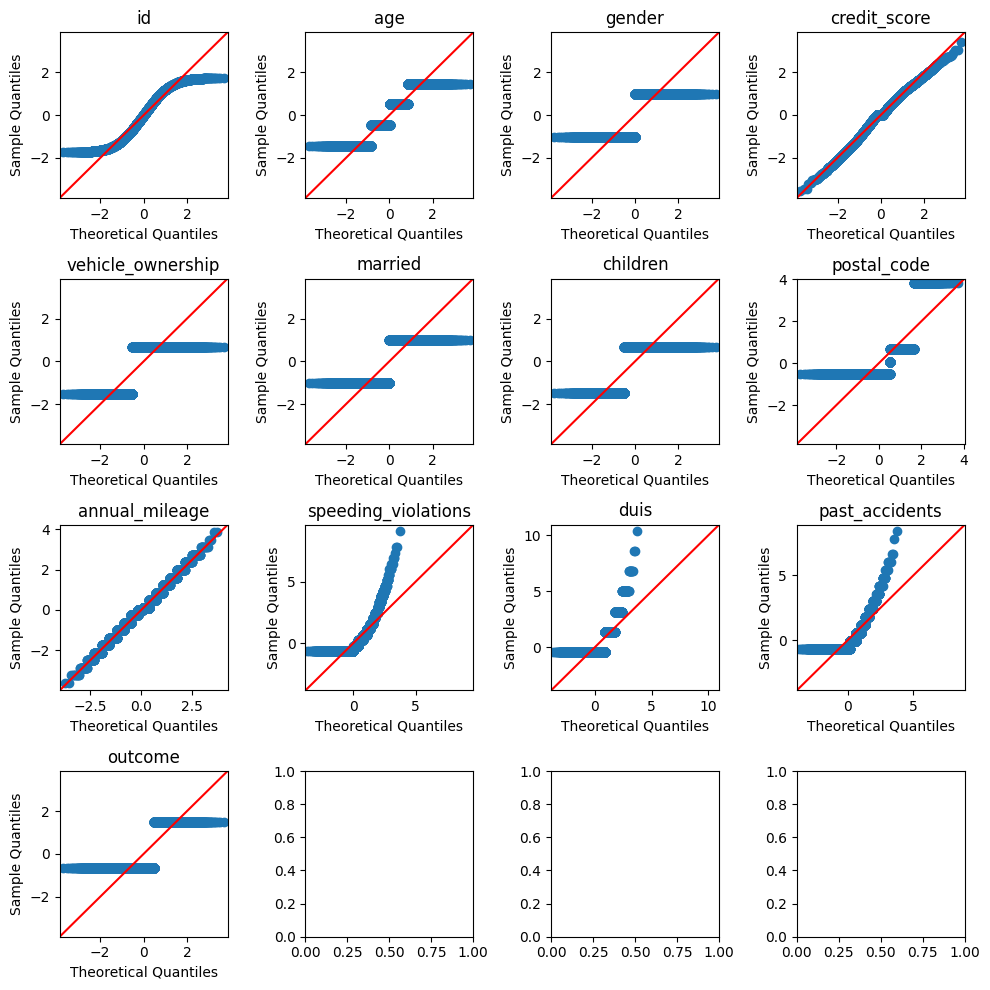

'videqqplot.png'

In [17]:
checking_normality_of_features_QQPLOT(df,"vide")

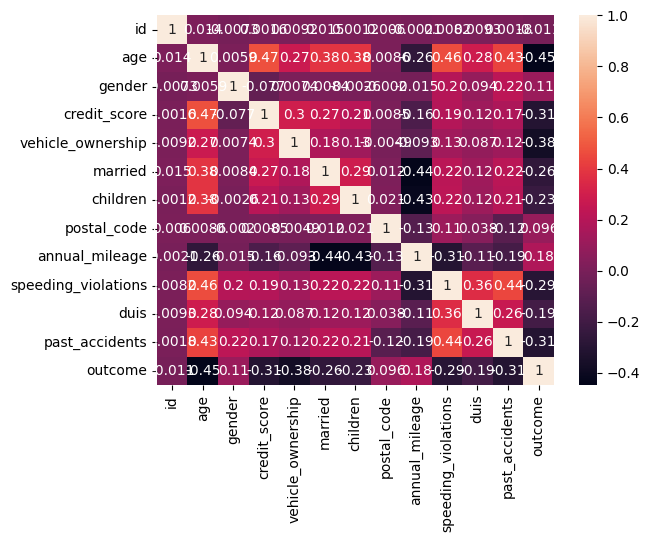

****************************************************************************************************
Liste des corrélations à analyser
****************************************************************************************************
age > credit_score : 0.471
age > vehicle_ownership : 0.272
age > married : 0.385
age > children : 0.384
age > annual_mileage : -0.264
age > speeding_violations : 0.458
age > duis : 0.282
age > past_accidents : 0.431
age > outcome : -0.448
gender > credit_score : -0.077
gender > speeding_violations : 0.202
gender > duis : 0.094
gender > past_accidents : 0.223
gender > outcome : 0.107
credit_score > vehicle_ownership : 0.296
credit_score > married : 0.267
credit_score > children : 0.21
credit_score > annual_mileage : -0.158
credit_score > speeding_violations : 0.195
credit_score > duis : 0.121
credit_score > past_accidents : 0.172
credit_score > outcome : -0.309
vehicle_ownership > married : 0.176
vehicle_ownership > children : 0.126
vehicle_ownership > an

In [20]:
generate_correlation_matrix(df,0.05,"vide")
report.doc_add_image("videcorrelation_matrix.png")

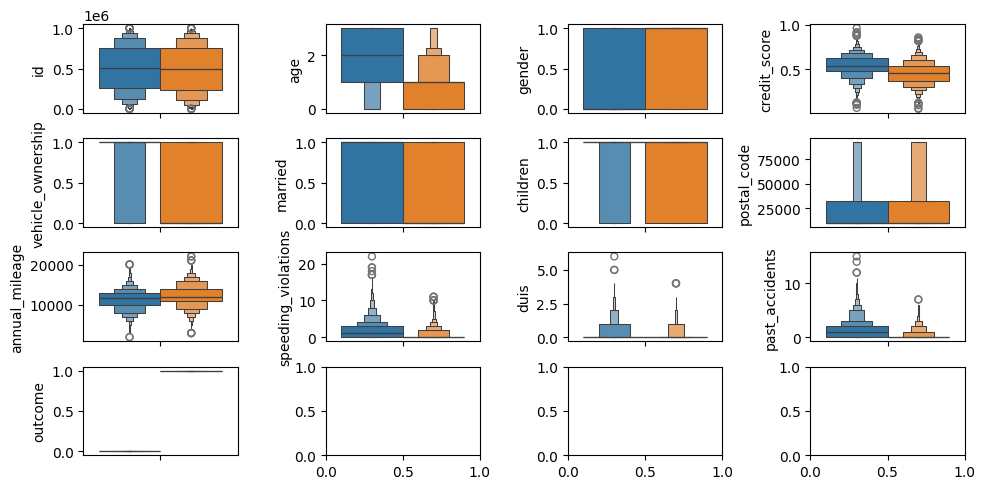

In [21]:
generate_box_plots(df,"outcome","vide","classification")

In [22]:
#generate_scatter_plots(df,"vide","outcome","classification")

In [23]:
checking_outliers(df)

Outliers avant cleaning
10       7
70       7
72       7
87       6
91       6
        ..
9716     6
9752     6
9904     6
9919     6
9928    15
Name: past_accidents, Length: 285, dtype: int64
****************************************************************************************************
Outliers après cleaning
5       3.0
6       3.0
24      3.0
38      5.0
40      3.0
       ... 
9958    4.0
9968    4.0
9974    3.0
9986    5.0
9987    4.0
Name: past_accidents, Length: 1244, dtype: float64
****************************************************************************************************


(            id  age  gender driving_experience    education         income  \
 0     569520.0    3       0               0-9y  high school    upper class   
 1     750365.0    0       1               0-9y         none        poverty   
 2     199901.0    0       0               0-9y  high school  working class   
 3     478866.0    0       1               0-9y   university  working class   
 4     731664.0    1       1             10-19y         none  working class   
 ...        ...  ...     ...                ...          ...            ...   
 9995  323164.0    1       0             10-19y   university    upper class   
 9996  910346.0    1       0             10-19y         none   middle class   
 9997  468409.0    1       1               0-9y  high school   middle class   
 9998  903459.0    1       0             10-19y  high school        poverty   
 9999  442696.0    1       0               0-9y         none  working class   
 
       credit_score  vehicle_ownership vehicle_yea

In [24]:
report.report_builder()

In [25]:
print(report.report_name)

Car_insurance
